# **1. Install Library**

In [1]:
# ! pip install mlxtend==0.21.0

In [2]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value=100
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

# **2. Read Data**

## 2.1 unrar

In [110]:
# ! unrar x drive/MyDrive/Data_FastRNN.rar

## 2.2 read data main

In [111]:
import pandas as pd
data_main=pd.read_excel("drive/MyDrive/data_fastrnn1.xlsx",header=[1],sheet_name='خبهمن')
data_main

,نماد,firm,date,تاریخ شمسی,داده ها از 90 تا 1400,اولين قيمت,بالاترين قيمت,كمترين قيمت,قيمت پاياني,ارزش معاملات,...,dps,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار
0,Bahman.Group,3,2011/03/02,1389/12/11,4406,2600,2669,2600,2665,10733900831,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,125.070955,NaN
1,Bahman.Group,3,2011/03/05,1389/12/14,4407,2720,2771,2710,2760,34961612481,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,125.446358,NaN
2,Bahman.Group,3,2011/03/06,1389/12/15,4408,2843,2843,2724,2820,54471566876,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,125.822496,NaN
3,Bahman.Group,3,2011/03/07,1389/12/16,4409,2735,2755,2710,2725,16925994843,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,126.199369,NaN
4,Bahman.Group,3,2011/03/08,1389/12/17,4410,2712,2834,2712,2806,32543743009,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,126.576979,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,Bahman.Group,3,2022/03/13,1400/12/22,6665,1718,1719,1671,1697,115499280263,...,377,120,14.633333,0.099039,8.211562,1335376.4,30.096101,1.167731e+07,121.357388,42000.0
2260,Bahman.Group,3,2022/03/14,1400/12/23,6666,1673,1719,1673,1697,68603812293,...,377,120,14.633333,0.099039,8.211562,1334776.9,29.929022,1.167140e+07,122.463734,42000.0
2261,Bahman.Group,3,2022/03/15,1400/12/24,6667,1677,1761,1677,1737,119951932762,...,377,120,14.633333,0.099039,8.211562,1337223.2,29.761546,1.166546e+07,122.833988,42000.0
2262,Bahman.Group,3,2022/03/16,1400/12/25,6668,1781,1823,1781,1821,354320314840,...,377,120,14.633333,0.099039,8.211562,1345018.2,29.593672,1.165950e+07,123.204977,42000.0


In [112]:
# data_main=data_main.iloc[0:11489]
# data_main

# **3. Preproceesing Data**

In [113]:
data_main.isna().sum()

نماد                      0
firm                      0
date                      0
تاریخ شمسی                0
داده ها از 90 تا 1400     0
اولين قيمت                0
بالاترين قيمت             0
كمترين قيمت               0
قيمت پاياني               0
ارزش معاملات              0
حجم معاملات               0
قيمت پيش گشايش            0
قيمت اولي                 0
آخرين قيمت                0
MA(5)                     4
MA(12)                   11
MA(26)                   25
EMA(12)                   0
EMA(26)                   0
MACD                     25
RSI                      14
dps                       0
eps                       0
p_e                       0
roa                       0
size                      0
شاخص کل                  13
تورم                     15
طلا                      15
نفت                      15
دلار                     12
dtype: int64

In [114]:
data_main_pre=data_main.fillna(0)
data_main_pre['lbl']=data_main_pre['قيمت پاياني']
data_main_pre.drop(['date','نماد','firm','داده ها از 90 تا 1400','تاریخ شمسی'],axis=1,inplace=True)
data_main_pre.drop('قيمت پاياني',axis=1,inplace=True)
data_main_pre

,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,قيمت اولي,آخرين قيمت,MA(5),MA(12),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
0,2600,2669,2600,10733900831,4027793,161,2567,2669,0.0,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,125.070955,0.0,2665
1,2720,2771,2710,34961612481,12666330,869,2665,2771,0.0,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,125.446358,0.0,2760
2,2843,2843,2724,54471566876,19313495,600,2760,2735,0.0,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,125.822496,0.0,2820
3,2735,2755,2710,16925994843,6211959,519,2820,2713,0.0,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,126.199369,0.0,2725
4,2712,2834,2712,32543743009,11598108,690,2725,2834,2744.4,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,126.576979,0.0,2806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,1718,1719,1671,115499280263,68077374,2032,1702,1703,1756.4,1776.666667,...,120,14.633333,0.099039,8.211562,1335376.4,30.096101,1.167731e+07,121.357388,42000.0,1697
2260,1673,1719,1673,68603812293,40424412,1364,1697,1691,1733.6,1762.833333,...,120,14.633333,0.099039,8.211562,1334776.9,29.929022,1.167140e+07,122.463734,42000.0,1697
2261,1677,1761,1677,119951932762,69057575,1831,1697,1725,1730.0,1759.500000,...,120,14.633333,0.099039,8.211562,1337223.2,29.761546,1.166546e+07,122.833988,42000.0,1737
2262,1781,1823,1781,354320314840,194605032,2522,1737,1823,1734.0,1763.916667,...,120,14.633333,0.099039,8.211562,1345018.2,29.593672,1.165950e+07,123.204977,42000.0,1821


In [115]:
data_final=data_main_pre

In [116]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
print("Original descriptives:")
display(data_final.describe().round(2))

print("\nMin-Max-scaled descriptives:")
scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()  #
scaler.fit(data_final)
data_scaled = scaler.transform(data_final)
df_scaled = pd.DataFrame(data_scaled, index=data_final.index, columns=data_final.columns)
display(df_scaled.describe().round(2))
data_normal=df_scaled


Original descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,قيمت اولي,آخرين قيمت,MA(5),MA(12),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2264.00,2264.00,2264.00,2.264000e+03,2.264000e+03,2264.00,2264.00,2264.00,2264.00,2264.00,...,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00
mean,1871.36,1903.90,1835.78,5.272385e+10,2.922103e+07,1092.50,1868.63,1866.96,1862.95,1855.96,...,341.49,7.01,0.12,7.35,214449.64,24.57,2991965.60,73.42,29336.11,1871.44
std,649.82,660.78,634.41,1.402071e+11,8.066827e+07,1703.33,643.97,647.97,645.15,642.65,...,142.71,12.31,0.03,0.29,369121.16,14.29,3445078.07,30.88,11216.79,648.13
min,721.00,760.00,720.00,1.834380e+06,1.161000e+03,2.00,730.00,720.00,0.00,0.00,...,120.00,3.04,0.09,7.20,0.00,0.00,0.00,0.00,0.00,739.00
25%,1404.00,1430.00,1374.50,3.734249e+09,2.178884e+06,220.00,1405.75,1409.75,1411.25,1411.12,...,207.00,3.47,0.10,7.21,61500.70,12.15,982958.06,50.01,24797.75,1406.75
50%,1866.00,1900.00,1830.00,1.083540e+10,6.465673e+06,500.00,1870.00,1859.00,1855.00,1853.00,...,375.00,5.06,0.11,7.26,77455.50,21.64,1176375.01,62.95,30196.00,1871.00
75%,2180.00,2210.25,2150.00,3.631820e+10,1.830575e+07,1198.50,2180.25,2178.00,2176.35,2182.52,...,425.00,5.66,0.13,7.29,158050.90,36.29,4440628.66,95.30,42000.00,2181.25
max,5596.00,5596.00,5542.00,2.461132e+12,1.444620e+09,18182.00,5342.00,5596.00,5346.60,4812.67,...,651.00,162.12,0.19,8.21,1575762.00,63.17,12334149.58,180.04,44120.00,5596.00



Min-Max-scaled descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,قيمت اولي,آخرين قيمت,MA(5),MA(12),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,...,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00
mean,0.24,0.24,0.23,0.02,0.02,0.06,0.25,0.24,0.35,0.39,...,0.42,0.02,0.31,0.15,0.14,0.39,0.24,0.41,0.66,0.23
std,0.13,0.14,0.13,0.06,0.06,0.09,0.14,0.13,0.12,0.13,...,0.27,0.08,0.27,0.28,0.23,0.23,0.28,0.17,0.25,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.14,0.14,0.00,0.00,0.01,0.15,0.14,0.26,0.29,...,0.16,0.00,0.13,0.01,0.04,0.19,0.08,0.28,0.56,0.14
50%,0.23,0.24,0.23,0.00,0.00,0.03,0.25,0.23,0.35,0.39,...,0.48,0.01,0.23,0.06,0.05,0.34,0.10,0.35,0.68,0.23
75%,0.30,0.30,0.30,0.01,0.01,0.07,0.31,0.30,0.41,0.45,...,0.57,0.02,0.41,0.10,0.10,0.57,0.36,0.53,0.95,0.30
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [117]:
data_ready = data_normal.copy()
lbl_ready=data_normal.iloc[:,-1]

print("_"*50)
print("data_final shape: {0}".format(data_ready.shape))
print("lbl_final shape: {0}".format(lbl_ready.shape))
print("_"*50)

__________________________________________________
data_final shape: (2264, 26)
lbl_final shape: (2264,)
__________________________________________________


# **5. time window**

In [118]:
data_ready.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'قيمت اولي', 'آخرين قيمت', 'MA(5)',
       'MA(12)', 'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps',
       'p_e', 'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

In [119]:
n_batch=32
feature_input_FastRNN=data_ready.columns.tolist()
feature_out_FastRNN=['lbl']
n_sequence=7

In [120]:
import numpy as np

def multivariate_win(dataset, target, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []
    start_index=0
    end_index = None
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)




In [121]:
STEP =1
n_step=1
past_history = n_sequence
index_precentage = -1

data_can,lbl_candel=multivariate_win(data_ready[feature_input_FastRNN].values,
                                            data_ready[feature_out_FastRNN].values,
                                            past_history,
                                            n_step, STEP,
                                            single_step=True)
print("_"*50)
print('-> data_can  shape = {0}'.format(data_can.shape))
print('-> lbl shape = {0}'.format(lbl_candel.shape))
print("_"*50)


__________________________________________________
-> data_can  shape = (2256, 7, 26)
-> lbl shape = (2256, 1)
__________________________________________________


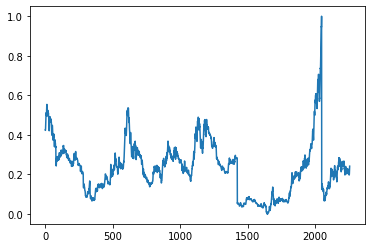

In [122]:
plt.plot(lbl_candel)
plt.show()

# **6. Train test split**

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_can , lbl_candel, test_size=0.10,shuffle=False, random_state=42)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_test.shape, "\n", y_test.shape)

 (2030, 7, 26) 
 (2030, 1) 
 (226, 7, 26) 
 (226, 1)


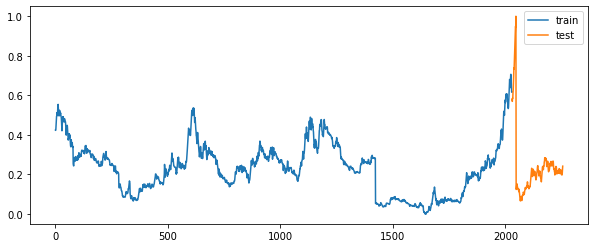

In [124]:
plt.figure(figsize=(10,4))
plt.plot(range(len(y_train)),y_train)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test)
plt.legend(['train','test'])
plt.show()

In [125]:
def fun_pre(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


def plot_pie(values,hlabels,uexplode=[0,0.1],my_color=["red","blue"]):
    plt.pie(values, 
            labels =hlabels,
            explode=uexplode,
            colors=my_color,
            autopct = lambda pct: fun_pre(pct, values))
    plt.legend()
    plt.show() 

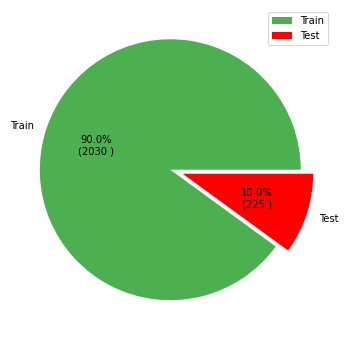

In [126]:
import matplotlib.pyplot as plt
import numpy as np
hlabels=["Train","Test"]
mycolors = [ "#4CAF50","red","blue","#0CFFF0"]

class1=X_train.shape[0]
class2=X_test.shape[0]


values=[class1,class2]
plt.figure(figsize=(6,6))
plt.title("",fontsize=14)
plot_pie(values,hlabels,[0,0.1],mycolors)
plt.show()

# **7.Horse herd optimization algorithm**

In [127]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


## 6.1 base code 

In [128]:
class Particle():
  def __init__(self):
          self.Position=[]
          self.Cost=[]
          self.Velocity=[]
          self.Best=[]

In [129]:
def HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt):

  w=1;
  phiD=0.02;
  phiI=0.02;


  g_Alpha=1.50;       #Grazing
  d_Alpha=0.5;        #Defense Mechanism
  h_Alpha=1.5;        #Hierarchy

  g_Beta=1.50;       # Grazing
  h_Beta=0.9;        #Hierarchy 
  s_Beta=0.20;       #Sociability
  d_Beta=0.20;       #Defense Mechanism

  g_Gamma=1.50;      #Grazing 
  h_Gamma=0.50;      #Hierarchy 
  s_Gamma=0.10;      #Sociability 
  i_Gamma=0.30;      #Imitation
  d_Gamma=0.10;      #Defense Mechanism 
  r_Gamma=0.05;      #Random (Wandering and Curiosity)

  g_Delta=1.50;      #Grazing
  r_Delta=0.10;      #Random (Wandering and Curiosity) 

  # Velocity limits
  VelMax = 0.3 * (VarMax - VarMin)
  VelMin = -VelMax



  Hourse = [Particle() for _ in range(nHourse)]
  GlobalBest=Particle()
  GlobalBest.Cost=np.inf;
  CostPositionCounter=np.zeros((nHourse,2+nVar));


  for i in range(nHourse):
      #Initialize Position
      Hourse[i].Position=np.random.uniform(VarMin, VarMax,VarSize)[0]
      #Initialize Velocity
      Hourse[i].Velocity=np.zeros(VarSize)

      #Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);
      #Update Personal Best
      Hourse[i].Best=deepcopy(Hourse[i])

      #Update Global Best
      if Hourse[i].Best.Cost<GlobalBest.Cost:
          GlobalBest=Hourse[i].Best;  
      ans=[i, Hourse[i].Best.Cost]
      ans.extend(Hourse[i].Best.Position.tolist())
      CostPositionCounter[i,:]=ans;

  BestCost = np.zeros((MaxIt, 1))

  #%%  Main Loop
  for it in range(MaxIt):
    CostPositionCounter=CostPositionCounter[CostPositionCounter[:, 1].argsort()]
    MeanPosition=np.mean(CostPositionCounter[0:nHourse,2:],axis=0);
    BadPosition=np.mean(CostPositionCounter[int((1-phiD)*nHourse):nHourse,2:],axis=0);
    GoodPosition=np.mean(CostPositionCounter[1:int(phiI*nHourse),2:],axis=0);
    for i in range(nHourse):
      CC=np.argwhere(CostPositionCounter[:,0]==i)[0][0]
      # Update Velocity
      if CC<=0.1*nHourse:
        Hourse[i].Velocity = h_Alpha*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        -d_Alpha*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Alpha*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
                
      elif CC<=0.3*nHourse:
        Hourse[i].Velocity = s_Beta*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
            -d_Beta*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
            +h_Beta*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
            +g_Beta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
          
      elif CC<=0.6*nHourse:
        Hourse[i].Velocity = s_Gamma*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
        +r_Gamma*rand(VarSize[1])*(Hourse[i].Position)\
        -d_Gamma*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
        +h_Gamma*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        +i_Gamma*rand(VarSize[1])*(GoodPosition-Hourse[i].Position)\
        +g_Gamma*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);
          
          
      else:
        Hourse[i].Velocity = +r_Delta*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Delta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);

      # Apply Velocity Limits
      Hourse[i].Velocity = np.maximum(Hourse[i].Velocity,VelMin);
      Hourse[i].Velocity = np.minimum(Hourse[i].Velocity,VelMax); 

      # Update Position
      Hourse[i].Position = Hourse[i].Position + Hourse[i].Velocity;
      
      # Velocity Mirror Effect
      IsOutside=(np.less(Hourse[i].Position, VarMin)\
                  | np.greater(Hourse[i].Position, VarMax))
      # IsOutside=IsOutside.reshape(1,-1)    
      Hourse[i].Velocity[IsOutside]=-Hourse[i].Velocity[IsOutside];
      
      # Apply Position Limits
      Hourse[i].Position = np.maximum(Hourse[i].Position,VarMin);
      Hourse[i].Position = np.minimum(Hourse[i].Position,VarMax);

      # Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);  

      # Update Personal Best
      if Hourse[i].Cost<Hourse[i].Best.Cost:
          Hourse[i].Best.Position=Hourse[i].Position;
          Hourse[i].Best.Cost=Hourse[i].Cost;
          # Update Global Best
          if Hourse[i].Best.Cost<GlobalBest.Cost:     
              GlobalBest=deepcopy(Hourse[i].Best);
    BestCost[it] = GlobalBest.Cost
    
    print(' , Iteration = '+ str(it)+\
              ', Best Cost = '+str(np.round(BestCost[it][0],4)))
    
    d_Alpha=d_Alpha*w; g_Alpha=g_Alpha*w;
    d_Beta=d_Beta*w; s_Beta=s_Beta*w; g_Beta=g_Beta*w;
    d_Gamma=d_Gamma*w; s_Gamma=s_Gamma*w
    r_Gamma=r_Gamma*w; i_Gamma=i_Gamma*w;
    g_Gamma=g_Gamma*w;
    r_Delta=r_Delta*w; g_Delta=g_Delta*w;
  return GlobalBest
    



## 6.2 Test 

In [130]:
from copy import copy, deepcopy
from numpy.random import rand
nHourse=10
nVar=10
VarMin = np.ones(nVar)*-100 # Lower bound of variables
VarMax = np.ones(nVar)*100 # Upper bound of variables
VarSize = (1, nVar) 
CostFunction=shpere;
MaxIt=10
best_sol=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


 , Iteration = 0, Best Cost = 7926.7754
 , Iteration = 1, Best Cost = 3205.5982
 , Iteration = 2, Best Cost = 1473.4122
 , Iteration = 3, Best Cost = 622.4319
 , Iteration = 4, Best Cost = 238.4505
 , Iteration = 5, Best Cost = 114.4625
 , Iteration = 6, Best Cost = 44.2248
 , Iteration = 7, Best Cost = 14.8693
 , Iteration = 8, Best Cost = 7.2986
 , Iteration = 9, Best Cost = 1.1983


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [131]:
best_sol.Position

array([ 0.55011729,  0.88931665,  0.12471224, -0.23115139, -0.05811639,
       -0.06130962,  0.017839  ,  0.02017913, -0.04445218,  0.16125986])

# **8.Spotted Hyena Optimizer**

In [132]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


In [133]:
def noh(best_hyena_fitness):
  min = 0.5;
  max = 1;
  count=0;
  M=(max-min)*rand() + min;
  M=M+best_hyena_fitness[0];

  for i in range(1,len(best_hyena_fitness)):
      if M>=best_hyena_fitness[i]:
        count=count+1;
  X=count;
  del count
  del M
  count=0;
  return X
  

## 7.1 base code 

In [134]:
import math
from numpy.random import rand

def SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations):

  # Initialize the hyena_pos of search agents
  hyena_pos = np.zeros((N, dimension))
  for i in range(N):
      #Initialize Position
      hyena_pos[i]=np.random.uniform(lowerbound, upperbound,dimension)

      
  Convergence_curve = np.zeros(Max_iterations)
  hyena_fitness=np.ones(N)*math.inf 


  #%%  Main Loop
  for Iteration in range(1,Max_iterations+1):
    for i in range(N):
      # Check boundries
      # FU=hyena_pos[i]>upperbound;
      # FL=hyena_pos[i]<lowerbound;
      # hyena_pos[i]=(hyena_pos[i]*(np.logical_not(FU+FL)))+FU*upperbound+FL*lowerbound
      # Apply  Limits
      hyena_pos[i] = np.maximum(hyena_pos[i],lowerbound);
      hyena_pos[i]= np.minimum(hyena_pos[i],upperbound); 

      hyena_fitness[i]=fitness(hyena_pos[i]);  


    if Iteration==1:
      idx_sort=np.argsort(hyena_fitness)
      fitness_sorted=hyena_fitness[idx_sort]
      sorted_population=hyena_pos[idx_sort].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()
    else:
      double_population=np.concatenate((pre_population,best_hyenas),axis=0);
      double_fitness=np.concatenate((pre_fitness,best_hyena_fitness),axis=0);
      idx_sort=np.argsort(double_fitness)
      double_fitness_sorted=double_fitness[idx_sort].copy()
      double_sorted_population=double_population[idx_sort].copy()
      fitness_sorted=double_fitness_sorted[0:N].copy()
      sorted_population=double_sorted_population[0:N].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()

    NOH=1+noh(best_hyena_fitness);
    Best_hyena_score=fitness_sorted[0].copy();
    Best_hyena_pos=sorted_population[0].copy();
    pre_population=hyena_pos.copy();
    pre_fitness=hyena_fitness.copy();
    
    a=5-Iteration*((5)/Max_iterations);
    HYE=0;
    CV=0;
    for i in range(N):
      for j in range(dimension):
        for k in range(NOH):
          HYE=0;
          r1=rand();
          r2=rand(); 
          Var1=2*a*r1-a; 
          Var2=2*r2; 
          distance_to_hyena=np.abs(Var2*sorted_population[k,j]-hyena_pos[i,j]);
          HYE=sorted_population[k,j]-Var1*distance_to_hyena;
          CV=CV+HYE;        
          distance_to_hyena=0;
        CV=np.array(CV)     
        hyena_pos[i,j]=(CV/(NOH+1));
        CV=0;
      
    Convergence_curve[Iteration-1]=Best_hyena_score;
    print(' , Iteration = '+ str(Iteration)+\
              ', Best Cost = '+str(np.round(Convergence_curve[Iteration-1],4)))
  return Best_hyena_pos,Best_hyena_score

## 7.2 Test 

In [135]:
from copy import copy, deepcopy
from numpy.random import rand
N=10
Max_iterations=10
dimension=10
lowerbound=np.ones(dimension)*-100 # Lower bound of variables
upperbound=np.ones(dimension)*100 # Lower bound of variables
fitness=shpere

best_Position,best_cost=SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations)


 , Iteration = 1, Best Cost = 11807.0525
 , Iteration = 2, Best Cost = 11807.0525
 , Iteration = 3, Best Cost = 6328.0729
 , Iteration = 4, Best Cost = 6328.0729
 , Iteration = 5, Best Cost = 5873.5248
 , Iteration = 6, Best Cost = 3697.2866
 , Iteration = 7, Best Cost = 3697.2866
 , Iteration = 8, Best Cost = 2585.6741
 , Iteration = 9, Best Cost = 869.455
 , Iteration = 10, Best Cost = 293.3845


# **9.FastRNN**

## 9.1 Main code 

In [136]:
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import gen_math_ops
from tensorflow.keras import backend as K
from keras import backend
import tensorflow as tf


def gen_non_linearity(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return math_ops.tanh(A)
    elif non_linearity == "sigmoid":
        return math_ops.sigmoid(A)
    elif non_linearity == "relu":
        return gen_math_ops.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

def gen_non_linearity_keras(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return K.tanh(A)
    elif non_linearity == "sigmoid":
        return K.sigmoid(A)
    elif non_linearity == "relu":
        return K.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return K.maximum(K.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

In [137]:
from keras.layers import RNN
from keras import backend
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.initializers import RandomNormal, Constant, Ones


class FastRNNCell(keras.layers.Layer):

    def __init__(self, units, update_non_linearity="tanh",
                 wRank=None, uRank=None, alphaInit=-3.0, betaInit=3.0,
                 name="FastRNN", reuse=None,
                 **kwargs):
        self._hidden_size = units
        self.state_size = units
        self._update_non_linearity =update_non_linearity
        self._num_weight_matrices = [1, 1]
        self._wRank = wRank
        self._uRank = uRank
        self._alphaInit = alphaInit
        self._betaInit =betaInit
        if self._wRank is not None:
            self._num_weight_matrices[0] += 1
        if self._uRank is not None:
            self._num_weight_matrices[1] += 1
        self._name =name
        self.units = units
        self.state_size = units
        self.U=None
        super(FastRNNCell, self).__init__(**kwargs)
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        if self._wRank is None:
            W_matrix_init = RandomNormal(0,0.1)
            self.W = self.add_weight(
                shape=(input_dim, self._hidden_size),
                name='W',
                initializer=W_matrix_init)
        else:
            W_matrix_1_init = RandomNormal(0,0.1)
            self.W1 = self.add_weight(
                shape=(input_dim, self._wRank),
                name='W1',
                initializer=W_matrix_1_init)
            W_matrix_2_init = RandomNormal(0,0.1)
            self.W2 = self.add_weight(
                shape=(self._wRank, self._hidden_size),
                name='W2',
                initializer=W_matrix_2_init)

        if self._uRank is None:
            U_matrix_init = RandomNormal(0,0.1)
            self.U = self.add_weight(
                shape=(self._hidden_size, self._hidden_size),
                name='U',
                initializer=U_matrix_init)
        else:
            U_matrix_1_init = RandomNormal(0,0.1)
            self.U1 = self.add_weight(
                shape=(self._hidden_size, self._uRan),
                name='U1',
                initializer=U_matrix_1_init)
            U_matrix_2_init = RandomNormal(0,0.1)
            self.U2 = self.add_weight(
                shape=(self._uRank, self._hidden_size),
                name='U2',
                initializer=U_matrix_2_init)

        alpha_init = Constant(self._alphaInit)
        self.alpha = self.add_weight(
            shape=(1,1),
            name='alpha',
            initializer=alpha_init)

        beta_init = Constant(self._betaInit)
        self.beta = self.add_weight(
            shape=(1,1),
            name='beta',
            initializer=beta_init) 
        bias_update_init = Ones()
        self.bias_update = self.add_weight(
            shape=(1, self._hidden_size),
            name='B_h',
            initializer=bias_update_init)
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        if self._wRank is None:
            wComp = K.dot(inputs, self.W)
        else:
            wComp = K.dot(
                K.dot(inputs, self.W1), self.W2)

        if self._uRank is None:
            uComp = K.dot(states[0], self.U)
        else:
            uComp = K.dot(
                K.dot(states[0], self.U1), self.U2)

        pre_comp = wComp + uComp

        c = gen_non_linearity_keras(
            pre_comp + self.bias_update, self._update_non_linearity)

        new_h = K.sigmoid(self.beta) * \
            states[0] + K.sigmoid(self.alpha) * c
        return new_h, [new_h]



## 9.2  Default FastRNN

In [138]:
# from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow import keras
def create_FastRNN_Base(data):
  fatrnn1=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_1")
  fatrnn2=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_2")
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  x=keras.layers.RNN(fatrnn1, return_sequences=True, name='fast_cell_1')(input_layer)
  x=keras.layers.RNN(fatrnn2, return_sequences=True, name='fast_cell_2')(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(50, activation='relu')(x)
  x = keras.layers.Dropout(0.1)(x)
  out= keras.layers.Dense(1)(x)
  model_base_FastRNN = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model_base_FastRNN.compile(optimizer=optimizerr,loss="mse")
  return model_base_FastRNN
model_base_FastRNN=create_FastRNN_Base(X_train)
model_base_FastRNN.summary()

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 26)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3746      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d_35 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_158 (Dense)           (None, 50)                1650      
                                                                 
 dropout_100 (Dropout)       (None, 50)                0         
                                                          

## 9.3 Fianl FastRNN

In [139]:
def get_new_fast_layer(uint,active,alpha,beta,name):
  return FastRNNCell(units=uint, 
                      update_non_linearity=active, 
                      alphaInit=alpha, 
                      betaInit=beta,
                  name=name)

In [140]:
from tensorflow import keras
def ceate_fast_rnn(data,dict_fast):
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  fastRNN1=get_new_fast_layer(dict_fast['units1'],
                     dict_fast['active1'],
                     dict_fast['alpha1'],
                     dict_fast['beta1'],'fastRNN_1')
  fastRNN2=get_new_fast_layer(dict_fast['units2'],
                     dict_fast['active2'],
                     dict_fast['alpha2'],
                     dict_fast['beta2'],'fastRNN_2')
  fastRNN3=get_new_fast_layer(dict_fast['units3'],
                     dict_fast['active3'],
                     dict_fast['alpha3'],
                     dict_fast['beta3'],'fastRNN_3')
  
  
  x=keras.layers.RNN(fastRNN1, return_sequences=True,name='fastRNN_1')(input_layer)
  if(dict_fast['use_layer2'] ):
    x=keras.layers.RNN(fastRNN2, return_sequences=True,name='fastRNN_2')(x)
  if(dict_fast['use_layer3'] ):
    x=keras.layers.RNN(fastRNN3, return_sequences=True,name='fastRNN_3')(x)

  if(dict_fast['use_batchnorm'] ):
    x=keras.layers.BatchNormalization()(x)
  # x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(dict_fast['dense1'], activation='relu')(x)
  x = keras.layers.Dense(dict_fast['dense2'], activation='relu')(x)
  x = keras.layers.Dropout(dict_fast['drop'])(x)
  out= keras.layers.Dense(1)(x)
  model = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model.compile(optimizer=optimizerr,loss="mse")
  return model





In [141]:
dict_fast=dict()
dict_fast['use_layer2']  =True
dict_fast['use_layer3']  =True
dict_fast['use_batchnorm']   =True
dict_fast['units1']  =32
dict_fast['active1'] ='relu'
dict_fast['alpha1']  =-1.0
dict_fast['beta1']   =1.0
dict_fast['units2']  =32
dict_fast['active2'] ='relu'
dict_fast['alpha2']  =-3.0
dict_fast['beta2']   =3.0
dict_fast['units3']  =32
dict_fast['active3'] ='relu'
dict_fast['alpha3']  =-3.0
dict_fast['beta3']   =3.0
dict_fast['dense1']   =200
dict_fast['dense2']   =200
dict_fast['drop']   =0.1
model=ceate_fast_rnn(X_train,dict_fast)
model.summary()

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 26)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 32)             3746      
                                                                 
 fastRNN_2 (RNN)             (None, 7, 32)             4130      
                                                                 
 fastRNN_3 (RNN)             (None, 7, 32)             4130      
                                                                 
 batch_normalization_27 (Bat  (None, 7, 32)            128       
 chNormalization)                                                
                                                                 
 global_max_pooling1d_36 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                        

# **10. Optimal FastRNN**

## 10.1 train and validation

In [142]:
from sklearn.model_selection import train_test_split

XX_train, XX_vali, yy_train, yy_vali = train_test_split(X_train , y_train, test_size=0.20,shuffle=False, random_state=42)
print("", XX_train.shape, "\n", yy_train.shape, 
      "\n", XX_vali.shape, "\n", yy_vali.shape)

 (1624, 7, 26) 
 (1624, 1) 
 (406, 7, 26) 
 (406, 1)


In [143]:
# XX_train, XX_vali, yy_train, yy_vali =X_train ,X_test, y_train,y_test
# print("", XX_train.shape, "\n", yy_train.shape, 
#       "\n", XX_vali.shape, "\n", yy_vali.shape)

## 10.2 Define parameter optimal

In [144]:
array_active=['tanh', 'sigmoid', 'relu', 'quantTanh']
array_units_rnn=[ 2**item for item in range(2,11)]
array_drop=[ item/100 for item in range(0,100,3)]
array_units_dense=[ 2**item for item in range(0,12)]
array_use=[False,True]
array_units_dense

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [145]:
lb=np.zeros(18)
ub=np.zeros(18)
lb[0]=0;ub[0]=1;   # 0 : use_layer2: True, False : 0-1
lb[1]=0;ub[1]=1;   # 1 : use_layer3: True, False : 0-1
lb[2]=0;ub[2]=1;   # 2 : use_batchnorm: True, False : 0-1

lb[3]=0;ub[3]=8;   # 3 : units1: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[4]=0;ub[4]=3;   # 4 : active1: ['relu','sigmoid','elu','tanh'] : 0-4
lb[5]=-10;ub[5]=0; # 5 : alpha1: [-10....0] : (-10,0)
lb[6]=0;ub[6]=10;  # 6 : beta1: [0....10] : (0,10)

lb[7]=0;ub[7]=8;   # 7 : units2: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[8]=0;ub[8]=3;   # 8 : active2: ['relu','sigmoid','elu','tanh'] : 0-4
lb[9]=-10;ub[9]=0; # 9 : alpha2: [-10....0] : (-10,0)
lb[10]=0;ub[10]=10;# 10 : beta2: [0....10] : (0,10)

lb[11]=0;ub[11]=9;   # 11 : units3: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[12]=0;ub[12]=3;   # 12 : active3: ['relu','sigmoid','elu','tanh'] : 0-4
lb[13]=-10;ub[13]=0; # 13 : alpha3: [-10....0] : (-10,0)
lb[14]=0;ub[14]=10;  # 14 : beta3: [0....10] : (0,10)

lb[15]=0;ub[15]=11;  # 15 : dense1: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[16]=0;ub[16]=11;  # 16 : dense2: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[17]=0;ub[17]=33;  # 17 : drop: [0.0, 0.03, 0.06, 0.09,.....0.93, 0.96, 0.99] : 0-34


## 10.3 fitness

In [146]:
def int_round(x):
  return np.int32(np.round(x))

In [147]:
def fitness(x):

  try:
    dict_fast=dict()
    dict_fast['use_layer2']      =array_use[int_round(x[0])]
    dict_fast['use_layer3']      =array_use[int_round(x[1])]
    dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
    dict_fast['units1']          =array_units_rnn[int_round(x[3])]
    dict_fast['active1']         =array_active[int_round(x[4])]
    dict_fast['alpha1']    =np.round(x[5],4)
    dict_fast['beta1']     =np.round(x[6],4)
    dict_fast['units2']    =array_units_rnn[int_round(x[7])]
    dict_fast['active2']   =array_active[int_round(x[8])]
    dict_fast['alpha2']    =np.round(x[9],4)
    dict_fast['beta2']     =np.round(x[10],4)
    dict_fast['units3']    =array_units_rnn[int_round(x[11])]
    dict_fast['active3']   =array_active[int_round(x[12])]
    dict_fast['alpha3']    =np.round(x[13],4)
    dict_fast['beta3']     =np.round(x[14],4)
    dict_fast['dense1']    =array_units_dense[int_round(x[15])]
    dict_fast['dense2']    =array_units_dense[int_round(x[16])]
    dict_fast['drop']      =array_drop[int_round(x[17])]
  except:
    return np.inf

  model=ceate_fast_rnn(XX_train,dict_fast)
  # model.summary()
  hist_model=model.fit(x=XX_train, y=yy_train,
                       validation_data=(XX_vali,yy_vali),
                       epochs=epochs_opti,shuffle=True,
                       batch_size=batch_size_opti,verbose=0)
  print("_"*100)
  print(x)

  for key, value in dict_fast.items():
      # print(".."*20)
      print(key,':',value)
  a=np.mean(hist_model.history['val_loss'][-10:])
  b=np.mean(hist_model.history['loss'][-10:])
  c=np.max(hist_model.history['loss'][-10:])
  
  val_loss_mean=60*a+40*b+100*c
  print(".."*10)
  print(val_loss_mean)
  print("_"*100)
  return val_loss_mean


In [148]:
import numpy as np
x=np.random.uniform(lb,ub,(len(lb)))

In [149]:

# epochs_opti=100
# batch_size_opti=256

# fitness(x)

## 10.4 hybrid FastRNN+HOA

In [150]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=128

# nHourse=7
# nVar=len(lb)
# VarMin =lb
# VarMax = ub
# VarSize = (1, nVar) 
# CostFunction=fitness;
# MaxIt=100
# best_sol_HOA=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


In [151]:
sol_opti_HOA=np.array([ 0.17103392 , 0.1487704 ,  0.4073051  , 1.52676658 , 0.8535066  ,-1.66622691,
  5.34720071 , 1.45825547 , 0.99759791 ,-3.94747756 , 2.96151109  ,2.79956542,
  1.34627779 ,-4.84814461 , 3.91645229 , 2.71288316 , 9.45647927 , 2.10596819])

In [152]:
# sol_opti_HOA=best_sol_HOA.Position

In [153]:
sol_opti_HOA

array([ 0.17103392,  0.1487704 ,  0.4073051 ,  1.52676658,  0.8535066 ,
       -1.66622691,  5.34720071,  1.45825547,  0.99759791, -3.94747756,
        2.96151109,  2.79956542,  1.34627779, -4.84814461,  3.91645229,
        2.71288316,  9.45647927,  2.10596819])

## 10.5 hybrid FastRNN+SHo

In [154]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=256

# N=8
# Max_iterations=30
# dimension=len(lb)
# lowerbound=lb
# upperbound=ub
# fitness=fitness

# best_sol_SHO,best_cost=SHO(N,nVar,lb,upperbound,dimension,fitness,Max_iterations)

In [155]:
best_sol_SHO=[ 5.48112837e-02,  0.00000000e+00,  1.73539730e-01 , 0.00000000e+00,
              3.61579705e-03,  0.00000000e+00 , 1.76786833e+00 , 0.00000000e+00,
              1.66580027e-01, -2.80736535e-01 , 0.00000000e+00 , 1.78200379e-01,
              1.43472805e+00, -7.07151722e-01 , 1.06100821e+00 , 0.00000000e+00,
              5.70250755e+00,  0.00000000e+00]

In [156]:
best_sol_SHO=np.array(best_sol_SHO)
best_sol_SHO

array([ 5.48112837e-02,  0.00000000e+00,  1.73539730e-01,  0.00000000e+00,
        3.61579705e-03,  0.00000000e+00,  1.76786833e+00,  0.00000000e+00,
        1.66580027e-01, -2.80736535e-01,  0.00000000e+00,  1.78200379e-01,
        1.43472805e+00, -7.07151722e-01,  1.06100821e+00,  0.00000000e+00,
        5.70250755e+00,  0.00000000e+00])

# **11. GAN**

In [157]:
feature_input_GAN=data_final.columns.tolist()
# feature_out_GAN=feature_input_GAN

In [158]:
n_batch=32
feature_input_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
feature_out_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
idx_col_GAN=feature_out_GAN.index('lbl')
n_sequence=7
n_features=len(feature_input_GAN)
idx_col_GAN

2

In [159]:
len(feature_out_GAN)

7

In [160]:
data_final.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'قيمت اولي', 'آخرين قيمت', 'MA(5)',
       'MA(12)', 'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps',
       'p_e', 'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

## 11.1 losss

In [161]:
def discriminator_loss(real_output, fake_output):
    real_loss = keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output)
    fake_loss = keras.losses.binary_crossentropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(x, y, fake_output):
    a1=0.01
    g_loss = keras.losses.binary_crossentropy(tf.ones_like(fake_output), fake_output)
    g_mse = keras.losses.MSE(x, y)
    return a1*g_mse + (1-a1)*g_loss, g_mse

## 11.2 Generator

In [162]:
from tensorflow import keras

def make_generator_model():

  inputs = keras.layers.Input(shape=(n_sequence, n_features,))
  x = keras.layers.LSTM(units=10, return_sequences = True,
                            activation=None)(inputs)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  x =        keras.layers.LSTM(units=10, return_sequences = False,
                             activation=None)(x)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  
  x =  keras.layers.Dense(n_features, activation=None)(x)
  output =        keras.layers.LeakyReLU(alpha=0.3)(x) 
  model = keras.models.Model(inputs = inputs, outputs = output)
  #model.compile(loss=generator_loss)
  # model.compile(loss=None, metrics = [mse , mae, mape, rmse, ar])
  model.compile(loss=None, metrics = ['mse' , 'mae'])
  return model


In [163]:
generator = make_generator_model()

## 11.3 discriminator

In [164]:
def make_discriminator_model():
  model = keras.models.Sequential()
  input_shape=((n_sequence+1) * n_features,)
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(units=72, input_shape=input_shape, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.GaussianNoise(stddev=0.2))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=100, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=10, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(1 ,activation='sigmoid'))
  model.compile(loss=discriminator_loss)
  return model

In [165]:
discriminator=make_discriminator_model()

## 11.4 training function

In [166]:

def train_step_def(sequences, sequences_end):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_prediction = generator(sequences, training=True)

    sequences_true = tf.concat((sequences, sequences_end[:, None, :]), axis=1)
    sequences_fake = tf.concat((sequences, generated_prediction[:, None, :]), axis=1)

    real_output = discriminator(sequences_true, training=True)
    fake_output = discriminator(sequences_fake, training=True)

    gen_loss, gen_mse_loss = generator_loss(generated_prediction, 
                                            sequences_end, 
                                            fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

def test_step_def(sequences, sequences_end):
  generated_prediction = generator(sequences, training=False)

  sequences_true = tf.concat((sequences, sequences_end[:,None,:]), axis=1)
  sequences_fake = tf.concat((sequences, generated_prediction[:,None,:]), axis=1)

  real_output = discriminator(sequences_true, training=False)
  fake_output = discriminator(sequences_fake, training=False)

  gen_loss, gen_mse_loss = generator_loss(generated_prediction, sequences_end, fake_output)
  disc_loss = discriminator_loss(real_output, fake_output)
  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

In [167]:
def train(dataset, dataset_val, epochs):
  history = np.empty(shape = (5, epochs))
  history_val = np.empty(shape = (5, epochs))
  len_dataset = len(dataset)
  len_dataset_val = len(dataset_val)
  for epoch in range(epochs):

    cur_dis_loss = 0
    cur_gen_loss = 0
    cur_gen_mse_loss = 0
    for sequence_batch, sequence_end_batch in dataset:
      aux_cur_losses = train_step(tf.cast(sequence_batch, tf.float32), 
                                  tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss += aux_cur_losses[0]/len_dataset
      cur_dis_loss += aux_cur_losses[1]/len_dataset
      cur_gen_mse_loss += aux_cur_losses[2]/len_dataset

    #cur_gen_loss = generator.evaluate(dataset,verbose=False)
    cur_gen_metrics = generator.evaluate(dataset,verbose=False)[1:]
    #cur_dis_loss = discriminator.evaluate(dataset,verbose=False)

    history[:, epoch] = cur_gen_loss, cur_dis_loss, cur_gen_mse_loss, *cur_gen_metrics
    #history[:, epoch] = cur_gen_loss, *cur_gen_slice_metrics

    #cur_gen_loss_val = generator.evaluate(dataset_val,verbose=False)
    cur_gen_metrics_val = generator.evaluate(dataset_val,verbose=False)[1: ]

    #cur_dis_loss_val = discriminator.evaluate(dataset_val,verbose=False)

    cur_gen_loss_val = 0
    cur_dis_loss_val = 0
    cur_gen_mse_loss_val = 0
    for sequence_batch, sequence_end_batch in dataset_val:
      aux_cur_losses_val = test_step(tf.cast(sequence_batch, tf.float32), 
                                     tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss_val += aux_cur_losses_val[0]/len_dataset_val
      cur_dis_loss_val += aux_cur_losses_val[1]/len_dataset_val
      cur_gen_mse_loss_val += aux_cur_losses_val[2]/len_dataset_val
    


    history_val[:, epoch] = cur_gen_loss_val, cur_dis_loss_val, cur_gen_mse_loss_val, *cur_gen_metrics_val

    # print ('Time for epoch {}  Generator Loss: {},  Discriminator_loss: {}'
    #        .format(epoch + 1, cur_gen_loss, cur_dis_loss))
      
  return history, history_val

## 11.5 plot loss function

In [168]:
metrics_names = ["gen_loss","dis_loss","gen_mse_loss", 'mse','mae']

def plot_history(history, history_val):
  for i, metric_name in enumerate(metrics_names):  
    plt.figure()
    plt.title(metric_name)
    plt.plot(history[i], label='train')
    plt.plot(history_val[i], label='test')
    plt.legend()
  plt.show()

In [169]:
def plot_frame(sequence, target, model):
  sequence, target = data_gen_test[0]
  y_pred = model.predict(sequence)[...,idx_col_GAN]
  y_true = target[...,idx_col_GAN]

  plt.figure()
  plt.title("closing price")
  plt.plot(y_true, label="true")
  plt.plot(y_pred, label="prediction")
  plt.legend()
  plt.show()

#plot_frame(*data_gen_test[0], generator)

In [170]:
def get_best_results(history):
  # get best mse
  min_index = np.argmin(history[3, :])

  return history[:, min_index]

#get_best_results(history_val)

## 11.6 train test Timeseries keras

In [171]:
def mean_squared_error(dataset):
  mse=0
  for X_batch, y_batch in dataset:
    mse += np.mean(np.square(X_batch[:, -1, idx_col_GAN:idx_col_GAN+1]-y_batch[:, idx_col_GAN:idx_col_GAN+1]))
  mse /= len(dataset)
  return mse


In [172]:
class Standarized_TimeseriesGenerator(tf.keras.preprocessing.sequence.TimeseriesGenerator):
  def __getitem__(self, index):
    samples, targets  = super(Standarized_TimeseriesGenerator, self).__getitem__(index)
    return samples, targets

In [173]:
def get_gen_train_test(dataframe):
  data = dataframe[feature_input_GAN].to_numpy()
  targets = dataframe[feature_out_GAN].to_numpy()
  n_samples = data.shape[0]
  train_test_split=int(n_samples*0.9)

  data_gen_train = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = 0,
                                end_index = train_test_split,
                                shuffle = True)
  data_gen_test = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = train_test_split,
                                end_index = n_samples-1)

  return data_gen_train, data_gen_test

data_gen_train, data_gen_test = get_gen_train_test(data_final)

# **12. kfold**

In [174]:
sol_opti_HOA=np.array([0.13067323, 0.06912944, 0.01500095, 0.77056502 ,1.02975468 ,0.,
                       0.78050012, 0.36090896, 0.42536474, 0.    ,     0.    ,     0.65263091,
                       0.27089382, 0.     ,    0.   ,      0.11750731, 2.92822265, 0.        ])

best_sol_SHO=np.array([ 0.11025329,  0.02655279,  0.16465339,  1.12350485,  1.71757352,
       -1.17794549,  0.46065275,  2.1950711 ,  0.4225301 , -3.1927    ,
        2.15624991,  0.96220718,  1.35504123, -1.52406924,  2.68233209,
        6.09256176,  9.03601318,  5.64185345])



In [175]:
def get_GAN_batch_pred(generator,data_gen):
  y_pred=[]
  y_true=[]
  for i in range(len(data_gen)):
    sequence, target = data_gen[i]
    y_pred .extend(generator.predict(sequence,verbose=False)[...,idx_col_GAN].tolist())
    y_true .extend(target[...,idx_col_GAN].tolist())
  return np.array(y_true),np.array(y_pred)

In [176]:
def get_gen_traintest(dataframe_train,datafrmae_test):
  data_train = dataframe_train[feature_input_GAN].to_numpy()
  targets_train = dataframe_train[feature_out_GAN].to_numpy()


  data_gen_train = Standarized_TimeseriesGenerator(data_train, targets_train,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = 0,
                                end_index = len(targets_train)-1,
                                shuffle = True)
  data_test= datafrmae_test[feature_input_GAN].to_numpy()
  targets_test= datafrmae_test[feature_out_GAN].to_numpy()

  data_gen_test = Standarized_TimeseriesGenerator(data_test, targets_test,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = 0,
                                end_index =len(targets_test)-1)

  return data_gen_train, data_gen_test


In [177]:
def get_dict_val(x):
  dict_fast=dict()
  dict_fast['use_layer2']      =array_use[int_round(x[0])]
  dict_fast['use_layer3']      =array_use[int_round(x[1])]
  dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
  dict_fast['units1']          =array_units_rnn[int_round(x[3])]
  dict_fast['active1']         =array_active[int_round(x[4])]
  dict_fast['alpha1']    =np.round(x[5],4)
  dict_fast['beta1']     =np.round(x[6],4)
  dict_fast['units2']    =array_units_rnn[int_round(x[7])]
  dict_fast['active2']   =array_active[int_round(x[8])]
  dict_fast['alpha2']    =np.round(x[9],4)
  dict_fast['beta2']     =np.round(x[10],4)
  dict_fast['units3']    =array_units_rnn[int_round(x[11])]
  dict_fast['active3']   =array_active[int_round(x[12])]
  dict_fast['alpha3']    =np.round(x[13],4)
  dict_fast['beta3']     =np.round(x[14],4)
  dict_fast['dense1']    =array_units_dense[int_round(x[15])]
  dict_fast['dense2']    =array_units_dense[int_round(x[16])]
  dict_fast['drop']      =array_drop[int_round(x[17])]
  return dict_fast

In [182]:
import pandas as pd
cv=5;
algorithm_name=["FastRNN_Base",
                "FastRNN_HOA",
                "FastRNN_SHO",
                "GAN_Base"]
zeros_data=np.zeros((len(algorithm_name)*cv,7));
res_metrics_train=pd.DataFrame(zeros_data,columns=["algorithm_name","MSE",
                                                   "RMSE","MAPE","MAE","R2","k"])

res_metrics_train["algorithm_name"]=algorithm_name*cv
res_metrics_test=res_metrics_train.copy()

res_metrics_test

,algorithm_name,MSE,RMSE,MAPE,MAE,R2,k
0,FastRNN_Base,0.0,0.0,0.0,0.0,0.0,0.0
1,FastRNN_HOA,0.0,0.0,0.0,0.0,0.0,0.0
2,FastRNN_SHO,0.0,0.0,0.0,0.0,0.0,0.0
3,GAN_Base,0.0,0.0,0.0,0.0,0.0,0.0
4,FastRNN_Base,0.0,0.0,0.0,0.0,0.0,0.0
5,FastRNN_HOA,0.0,0.0,0.0,0.0,0.0,0.0
6,FastRNN_SHO,0.0,0.0,0.0,0.0,0.0,0.0
7,GAN_Base,0.0,0.0,0.0,0.0,0.0,0.0
8,FastRNN_Base,0.0,0.0,0.0,0.0,0.0,0.0
9,FastRNN_HOA,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
from sklearn import metrics 
import math
def get_metrics(lbl_real,y_pred,data_pd,Row,c):

  mse=metrics.mean_squared_error(lbl_real, y_pred)
  rmse = math.sqrt(mse)
  mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
  mae=metrics.mean_absolute_error(lbl_real,y_pred)
  r2= metrics.r2_score(lbl_real, y_pred)


  mse=round(mse,4)
  rmse=round(rmse,4)
  rmse=round(rmse,4)
  mape=round(mape,4)
  r2=round(r2,4)

  data_pd.iloc[Row,1]=mse
  data_pd.iloc[Row,2]=rmse
  data_pd.iloc[Row,3]=mae
  data_pd.iloc[Row,4]=mape
  data_pd.iloc[Row,5]=r2
  data_pd.iloc[Row,6]=int(c)



  return data_pd

In [180]:
epochs_value=100
bt_value=32
EPOCHS=500

In [184]:
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
import os
import pickle
tscv = TimeSeriesSplit(n_splits = cv)

Row=-1
c=0
for train_idx, test_idx in tscv.split(data_can):
  c+=1
  train_data, test_data = data_can[train_idx], data_can[test_idx]
  train_lbl, test_lbl = lbl_candel[train_idx], lbl_candel[test_idx]


  print("_"*100)
  print("TRAIN:", train_data.shape[0], "TEST:", test_data.shape[0])

  #----FastRnn------------
  print("FastRnn in fold: {}".format(c))
  Row+=1
  model_FastRNN_Base=create_FastRNN_Base(X_train)
  model_FastRNN_Base.fit(train_data,train_lbl,epochs=epochs_value,
                 batch_size=bt_value,verbose=False)
  
  pred_train=model_FastRNN_Base.predict(train_data,verbose=False)
  pred_test=model_FastRNN_Base.predict(test_data,verbose=False)
  # get all metrics for test and train
  res_metrics_train=get_metrics(train_lbl,pred_train,res_metrics_train,Row,c)
  res_metrics_test=get_metrics(test_lbl,pred_test,res_metrics_test,Row,c)


  #----FastRNN_HOA------------
  print("FastRNN_HOA in fold: {}".format(c))
  dict_fast=get_dict_val(sol_opti_HOA)
  Row+=1
  FastRNN_HOA=ceate_fast_rnn(X_train,dict_fast)
  FastRNN_HOA.fit(train_data,train_lbl,epochs=epochs_value,
                 batch_size=bt_value,verbose=False)
  
  pred_train=FastRNN_HOA.predict(train_data,verbose=False)
  pred_test=FastRNN_HOA.predict(test_data,verbose=False)
  # get all metrics for test and train
  res_metrics_train=get_metrics(train_lbl,pred_train,res_metrics_train,Row,c)
  res_metrics_test=get_metrics(test_lbl,pred_test,res_metrics_test,Row,c)

  #----FastRNN_SHO------------
  print("FastRNN_SHO in fold: {}".format(c))
  dict_fast=get_dict_val(best_sol_SHO)
  Row+=1
  FastRNN_SHO=ceate_fast_rnn(X_train,dict_fast)
  FastRNN_SHO.fit(train_data,train_lbl,epochs=epochs_value,
                 batch_size=bt_value,verbose=False)
  
  pred_train=FastRNN_SHO.predict(train_data,verbose=False)
  pred_test=FastRNN_SHO.predict(test_data,verbose=False)
  # get all metrics for test and train
  res_metrics_train=get_metrics(train_lbl,pred_train,res_metrics_train,Row,c)
  res_metrics_test=get_metrics(test_lbl,pred_test,res_metrics_test,Row,c)

  #----GAN_Base------------
  print("GAN_Base in fold: {}".format(c))
  Row+=1

  @tf.function
  def train_step(sequences, sequences_end):
    return train_step_def(sequences, sequences_end)

  @tf.function
  def test_step(sequences, sequences_end):
    return test_step_def(sequences, sequences_end)

  d_train=data_normal.iloc[train_idx]
  d_train.reset_index(inplace=True,drop=True)
  d_test=data_normal.iloc[test_idx]
  d_test.reset_index(inplace=True,drop=True)


  data_gen_train, data_gen_test = get_gen_traintest(d_train,d_test)

  generator = make_generator_model()
  discriminator=make_discriminator_model()
  learning_rate=1e-4
  generator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)
  discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)
  history, history_val = train(data_gen_train, data_gen_test, EPOCHS)
  lbl_train,pred_train=get_GAN_batch_pred(generator,data_gen_train)
  lbl_test,pred_test=get_GAN_batch_pred(generator,data_gen_test)
  # get all metrics for test and train
  res_metrics_train=get_metrics(lbl_train,pred_train,res_metrics_train,Row,c)
  res_metrics_test=get_metrics(lbl_test,pred_test,res_metrics_test,Row,c)



____________________________________________________________________________________________________
TRAIN: 376 TEST: 376
FastRnn in fold: 1
FastRNN_HOA in fold: 1
FastRNN_SHO in fold: 1
GAN_Base in fold: 1
____________________________________________________________________________________________________
TRAIN: 752 TEST: 376
FastRnn in fold: 2
FastRNN_HOA in fold: 2
FastRNN_SHO in fold: 2
GAN_Base in fold: 2
____________________________________________________________________________________________________
TRAIN: 1128 TEST: 376
FastRnn in fold: 3
FastRNN_HOA in fold: 3
FastRNN_SHO in fold: 3
GAN_Base in fold: 3
____________________________________________________________________________________________________
TRAIN: 1504 TEST: 376
FastRnn in fold: 4
FastRNN_HOA in fold: 4
FastRNN_SHO in fold: 4
GAN_Base in fold: 4
____________________________________________________________________________________________________
TRAIN: 1880 TEST: 376
FastRnn in fold: 5
FastRNN_HOA in fold: 5
FastR

In [ ]:
# res_metrics_test.iloc[29,0]='FastRNN_HOA'

In [185]:
res_metrics_test

,algorithm_name,MSE,RMSE,MAPE,MAE,R2,k
0,FastRNN_Base,0.0013,0.0355,0.025521,1.032000e-01,0.8668,1.0
1,FastRNN_HOA,0.0097,0.0983,0.079820,3.785000e-01,-0.0204,1.0
2,FastRNN_SHO,0.0014,0.0370,0.029248,1.150000e-01,0.8551,1.0
3,GAN_Base,0.0016,0.0396,0.027448,9.830000e-02,0.8361,1.0
4,FastRNN_Base,0.0006,0.0248,0.017950,7.270000e-02,0.8409,2.0
5,FastRNN_HOA,0.0040,0.0631,0.051389,2.323000e-01,-0.0306,2.0
6,FastRNN_SHO,0.0003,0.0178,0.014143,5.890000e-02,0.9179,2.0
7,GAN_Base,0.0005,0.0216,0.016257,6.360000e-02,0.8668,2.0
8,FastRNN_Base,0.0020,0.0453,0.034997,2.739000e-01,0.8802,3.0
9,FastRNN_HOA,0.0008,0.0275,0.016127,1.026000e-01,0.9559,3.0


In [187]:
res_metrics_test.groupby(by='algorithm_name').mean()

,MSE,RMSE,MAPE,MAE,R2,k
algorithm_name,,,,,,
FastRNN_Base,0.00362,0.04944,0.035607,4.070477e+10,0.77760,3.0
FastRNN_HOA,0.00966,0.07914,0.055532,2.660763e+10,0.31000,3.0
FastRNN_SHO,0.00200,0.03928,0.026004,4.886985e+10,0.84310,3.0
GAN_Base,0.00786,0.06556,0.052239,2.158469e+10,0.52596,3.0


In [ ]:

res_metrics_test.to_excel('res_metrics_test2.xlsx')
res_metrics_train.to_excel('res_metrics_train2.xlsx')

In [ ]:
mean_test2=res_metrics_test.groupby(by='algorithm_name').mean()
mean_test2.to_excel('mean_test2.xlsx')


In [ ]:
mean_train2=res_metrics_train.groupby(by='algorithm_name').mean()
mean_test2.to_excel('mean_train2.xlsx')

# **12. Run all methods**

In [ ]:
# from prettytable import PrettyTable

# # Specify the Column Names
# myTable = PrettyTable(["algorithm_name","MSE","RMSE","MAE","R2"])
# print(myTable)
myTable=[]

In [ ]:
# ! pip install prettytable

## 12.1 FastRNN-Base

In [ ]:
model_FastRNN_Base=create_FastRNN_Base(X_train)
model_FastRNN_Base.summary()

In [ ]:
hist_model_FastRNN_Base=model_FastRNN_Base.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

In [ ]:
from sklearn import metrics
import math
y_pred=model_FastRNN_Base.predict(X_train,verbose=0)
mse=metrics.mean_squared_error(y_train, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_train,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_train,y_pred) 
r2= metrics.r2_score(y_train, y_pred)
#----save to table --------
myTable.append(['FastRNN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(y_train,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_train),max(y_train)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by FastRNN_Base')
plt.show()

## 12.2 FastRNN-HOA

In [ ]:
sol_opti_HOA=np.array([ 0.27728494,  0.02874808,  0.25567505,  0.6926708 ,  0.8110652 ,
        0.        ,  0.42749874,  0.        ,  0.52687585, -0.37489377,
        0.45783291,  0.57537696,  0.        , -2.67691579,  0.04416233,
        1.96404219,  3.21479994,  0.        ])

In [ ]:
x=sol_opti_HOA.copy()

In [ ]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


In [ ]:
FastRNN_HOA=ceate_fast_rnn(X_train,dict_fast)
FastRNN_HOA.summary()

In [ ]:
# fitness(x)

In [ ]:
hist_model_FastRNN_HOA=FastRNN_HOA.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

In [ ]:
from sklearn import metrics
import math
y_pred=FastRNN_HOA.predict(X_train,verbose=0)
mse=metrics.mean_squared_error(y_train, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_train,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_train,y_pred) 
r2= metrics.r2_score(y_train, y_pred)
#----save to table --------
myTable.append(['FastRNN_HOA',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(y_train,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_train),max(y_train)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by FastRNN_HOA')
plt.show()

## 12.3 FastRNN-SHO

In [ ]:
best_sol_SHO=np.array([ 0.03142637 , 0.05228207 , 0.01002905 , 1.77286487 , 1.58091553 ,-0.31977477,
  0.08372517 , 0.18269182 , 0.8424293  , 0.         , 1.19818279  ,5.02238546,
  0.03392638 ,-1.07749513 , 2.63150679 , 0.51131201 , 7.07727132  ,0.13080044])

In [ ]:
x=best_sol_SHO.copy()

In [ ]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


In [ ]:
FastRNN_SHO=ceate_fast_rnn(X_train,dict_fast)
FastRNN_SHO.summary()

In [ ]:
hist_model_FastRNN_SHO=FastRNN_SHO.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

In [ ]:
from sklearn import metrics
y_pred=FastRNN_SHO.predict(X_train,verbose=0)

mse=metrics.mean_squared_error(y_train, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_train,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_train,y_pred) 
r2= metrics.r2_score(y_train, y_pred)
#----save to table --------
myTable.append(['FastRNN_SHO',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)


In [ ]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_SHO')
plt.show()

## 12.4 GAN_Base

In [ ]:
EPOCHS = 500

In [ ]:
data_gen_train, data_gen_test = get_gen_train_test(data_normal)

generator = make_generator_model()
discriminator=make_discriminator_model()

learning_rate=1e-4
generator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)

@tf.function
def train_step(sequences, sequences_end):
  return train_step_def(sequences, sequences_end)

@tf.function
def test_step(sequences, sequences_end):
  return test_step_def(sequences, sequences_end)
history, history_val = train(data_gen_train, data_gen_test, EPOCHS)
plot_history(history, history_val)







In [ ]:
history, history_val = train(data_gen_train, data_gen_test, EPOCHS)
plot_history(history, history_val)


In [ ]:
y_pred=[]
y_true=[]
for i in range(len(data_gen_train)):
  sequence, target = data_gen_train[i]
  y_pred .extend(generator.predict(sequence)[...,idx_col_GAN].tolist())
  y_true .extend(target[...,idx_col_GAN].tolist())

plt.figure()
plt.title("closing price")
plt.plot(y_true, label="true")
plt.plot(y_pred, label="prediction")
plt.legend()
plt.show()


In [ ]:
from sklearn import metrics
import math

mse=metrics.mean_squared_error(y_true, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_true,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_true,y_pred) 
r2= metrics.r2_score(y_true, y_pred)
#----save to table --------
myTable.append(['GAN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)



# mse=metrics.mean_squared_error(y_true, y_pred)
# rmse= math.sqrt(mse) 
# mae=metrics.mean_absolute_error(y_true,y_pred)  
# r2= metrics.r2_score(y_true, y_pred)
# #----save to table --------
# myTable.append(['GAN_Base',
#                  np.round(mse,4),
#                  np.round(rmse,4),
#                  np.round(mae,4),
#                  np.round(r2,4)
#                   ])
# print(myTable)

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(y_true,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_true),max(y_true)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by GAN_Base')
plt.show()

In [ ]:
y_pred_GAN=y_pred

# **13. Final Result**

In [ ]:
myTable=np.array(myTable)
print(myTable)

In [ ]:
[['FastRNN_Base' '0.0008' '0.0283' '0.0152' '0.9798' '9114834220.3163']
 ['FastRNN_HOA' '0.0006' '0.0239' '0.0119' '0.9857' '12718798344.609']
 ['FastRNN_SHO' '0.0008' '0.0281' '0.0213' '0.9802' '11727683715.711']
 ['GAN_Base' '0.0006' '0.0253' '0.0176' '0.9846' '108823635265.7498']]
data_res=pd.DataFrame(myTable,columns=["algorithm_name","MSE","RMSE","MAE","R2","MAPE"])
data_res=data_res[["algorithm_name","MSE","RMSE","MAE","MAPE","R2"]]
data_res[["MSE","RMSE","MAE","MAPE","R2"]]=data_res[["MSE","RMSE","MAE","MAPE","R2"]].astype(float)
data_res

In [ ]:
data_res.to_excel('out_train_1.xlsx')

In [ ]:
# tbl_as_csv = myTable.get_csv_string().replace('\r','')
# text_file = open("output_all.csv", "w")
# n = text_file.write(tbl_as_csv)
# text_file.close()
# data_res_metric=pd.read_csv("output_all.csv")
# data_res_metric

In [ ]:
y_pred_GAN=y_test[0:len(y_test)-len(y_pred)].reshape(-1).tolist()

In [ ]:
y_pred_GAN.extend(y_pred)
y_pred_SHO=FastRNN_SHO.predict(X_test,verbose=0)
y_pred_HOA=FastRNN_HOA.predict(X_test,verbose=0)
y_pred_RNN=model_FastRNN_Base.predict(X_test,verbose=0)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'k-',label='Test real')
plt.plot(y_pred_RNN,label='FastRNN_Base')
plt.plot(y_pred_HOA,label='FastRNN_HOA')
plt.plot(y_pred_SHO,label='FastRNN_SHO')
plt.plot(y_pred_GAN,label='GAN_Base')
idx=range(len(y_train),len(y_train)+len(y_test),5)
plt.xticks(range(0,len(y_test),5),data_main['تاریخ شمسی'].values[idx],rotation=90)
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(axis='both')
plt.legend()
plt.savefig('out1_final.png')
plt.show()


In [ ]:
y_pred_GAN

In [ ]:
import pickle
filename = 'fastrnn_1.pkl'
pickle.dump(model_FastRNN_Base, open(filename, 'wb'))

filename = 'FastRNN_SHO_1.pkl'
pickle.dump(FastRNN_SHO, open(filename, 'wb'))

filename = 'FastRNN_HOA_1.pkl'
pickle.dump(FastRNN_HOA, open(filename, 'wb'))

filename = 'GAN_Base_1.pkl'
pickle.dump(generator, open(filename, 'wb'))